<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Numerical-Analysis/blob/main/Gauss_Seidel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 : [2.6166666666666667, -2.7945238095238096, 7.0056095238095235]
2 : [2.990556507936508, -2.499624684807256, 7.00029081106576]
3 : [3.0000318979108087, -2.499987992353051, 6.999999283215615]
4 : [3.000000352469273, -2.5000000357546064, 6.99999998871083]


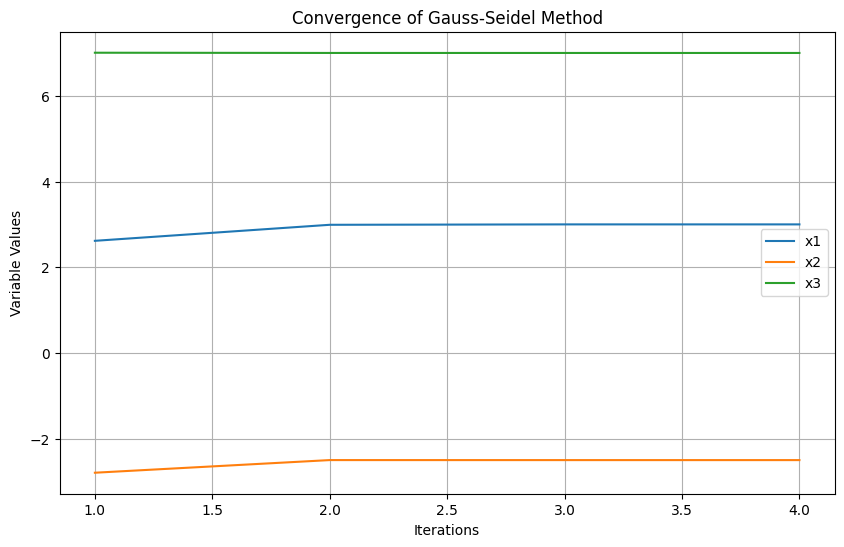

In [2]:
import math
import matplotlib.pyplot as plt

def gaussSeidel(coefficient_matrix, constants, err):
    N = len(coefficient_matrix)
    x = [0] * N
    iterations = []
    values = [[] for _ in range(N)]

    for count in range(100):
        flag_err = True
        for idx in range(N):
            x_old = x[idx]
            x[idx] = (constants[idx] - inner(coefficient_matrix[idx], x, idx)) / coefficient_matrix[idx][idx]

            if flag_err:
                if math.fabs((x[idx] - x_old) / x[idx]) >= err:
                    flag_err = False

        iterations.append(count + 1)
        for idx in range(N):
            values[idx].append(x[idx])

        print(f"{count + 1} : {x}")
        if flag_err:
            break

    return iterations, values

def inner(coefficient, unknown_variable, pos):
    s = 0
    for idx, x in enumerate(unknown_variable):
        if idx == pos:
            continue
        s += coefficient[idx] * x
    return s

def plot_convergence(iterations, values):
    plt.figure(figsize=(10, 6))
    for idx, val in enumerate(values):
        plt.plot(iterations, val, label=f'x{idx+1}')

    plt.xlabel('Iterations')
    plt.ylabel('Variable Values')
    plt.title('Convergence of Gauss-Seidel Method')
    plt.legend()
    plt.grid(True)
    plt.show()

coefficient_matrix = [[3, -0.1, -0.2],
                      [0.1, 7, -0.3],
                      [0.3, -0.2, 10]]

constants = [7.85, -19.3, 71.4]
err = 0.0005  # 오차

iterations, values = gaussSeidel(coefficient_matrix, constants, err)
plot_convergence(iterations, values)